**Activation Functions**



1.  Linear
2.  Relu=> f(x)=max(x,0) -- hidden layers
3.  sigmoid -- output layes(binary class
4.  softmax -- output layer multi class



**Types of Neural Networks**


1.   Perceotron
2.   Feed Forward ANN(MLP)
3.   CNN (image related)
4.   Radial Basis Function NN
5.   Recurrent NN -sentimental analysis
6.   Long Short-Term Memory Networks-sentimental analysis



CNN is mostly used for image data.
It also has input,hidden and output layers

In the hidden layers the following steps are included

1.   Convolution
2.   Max Pooling
3.   Flattening
4.   Full Connection



1. Convolution : is the first layer and is used to extract valuable features form the input image
it has severals filters and takes two inputs image and kernel. it reduces the image size by convolving the input image with the filters.

2.Max Pooling: it reduced the image dimensionality without losing important features or patterns. it reduces the number of parameters when the image are too large.it is done by applying a max filter to non-overlapping sub-regions of the initial repredentation

3. Flattening : it transforms a 2Dimentional matrix of features into a vector that can be fed into fully connected neural network classifier.

4. Full Connection: also known as dense layer in which the results of the convolution layer are fed through one or more neural layers to generate a prediction.




i/p->conv layer1-> polling layer1->conv layer2->pollong layer2-> flattening layer->dense layer

we need to select the number of conv+polling layer in our model

1. Problem identification
2.Data Collection
3. Data Pre-processing
4. select Deep Learning Algo
5. Train model
6. Test model
7. evaluate the performance
8. deployment




->define the model
->compile network
->Fit network
->evaluate network
->make predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # visualisation
import tensorflow as tf
from tensorflow.keras import datasets # for cifar-10 data 

In [ ]:
# download the dataset
(train_img,train_labels),(test_img,test_lables)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_img

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
#normalization of pixels values in the range of 0 to 1
train_img,test_img=train_img/255.0,test_img/255.0


In [ ]:
# 10 image class
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

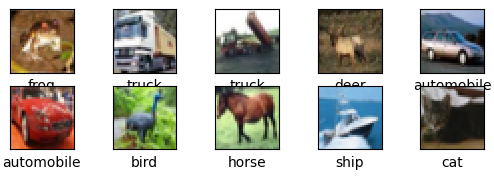

In [ ]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(train_img[i])
  plt.xlabel(class_name[train_labels[i][0]])

plt.show()

In [ ]:
# Creating the CNN model

#initialization of model
from keras.models import Sequential
model=Sequential()

In [ ]:
#Step 1 - Convolution

from keras.layers import Conv2D
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu')) # 3*3 filer # 32 neurons # input image size = 32*32*3

In [ ]:
#Step2 - pollling

from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2,2)))
#the 32 features maps from Conv2D output pas-through maxPooling of (2,2) size


In [ ]:
# adding a second colvolution and pooling layer
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Step -3 : Flattening 
from keras.layers import Flatten
model.add(Flatten())

In [ ]:
# step4 - create dense layer
from keras.layers import Dense

model.add(Dense(units=64,activation='relu'))

#creates a fully connected neural network with 127 neurons

model.add(Dense(units=10,activation='softmax'))# output layer
# this fully connected layer should have number neurons as many as the class number

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

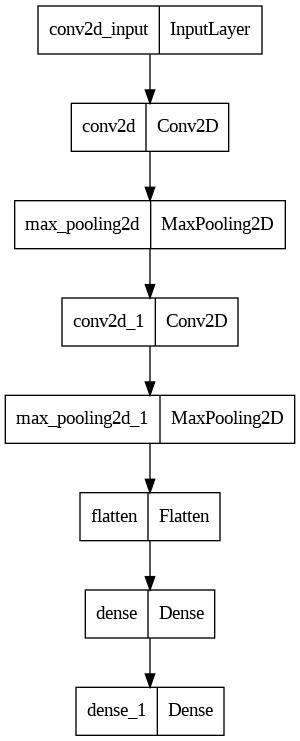

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='cnn_mod.png')

In [ ]:
# compile the model

model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(train_img,train_labels,epochs=20,validation_data=(test_img,test_lables),batch_size=64) # epochs 10 - means 10 iterations

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.6092 - accuracy: 0.7880 - val_loss: 0.9337 - val_accuracy: 0.6935
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.5953 - accuracy: 0.7930 - val_loss: 0.9215 - val_accuracy: 0.6952
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.5790 - accuracy: 0.7973 - val_loss: 0.9556 - val_accuracy: 0.6914
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.5615 - accuracy: 0.8008 - val_loss: 0.9864 - val_accuracy: 0.6823
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.5410 - accuracy: 0.8098 - val_loss: 0.9726 - val_accuracy: 0.6802
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.5246 - accuracy: 0.8171 - val_loss: 0.9695 - val_accuracy: 0.6933
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.5063 - accuracy: 0.8205 - val_loss: 1.0056 - val_accuracy: 0.6839
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

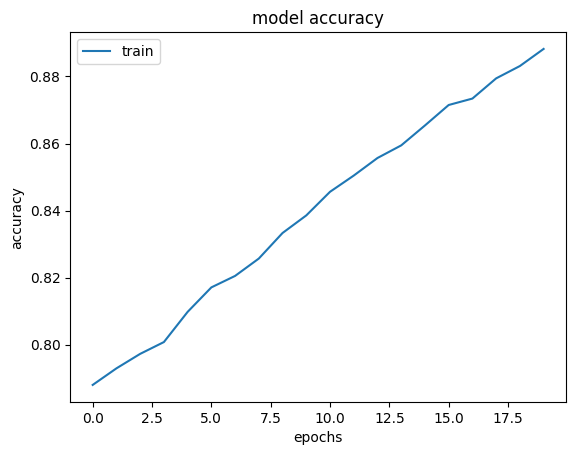

In [ ]:
#evaluation of performance

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')
plt.show

1/1 [==============================] - 0s 21ms/step
Output Label: 8
ship


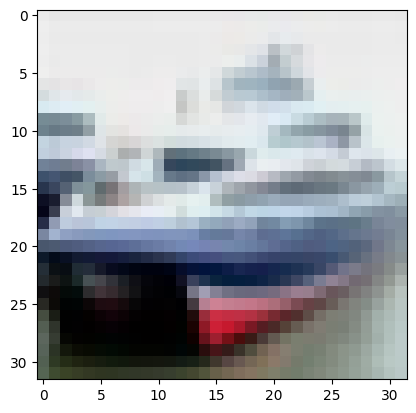

In [ ]:
# testing the model
import numpy as np
plt.imshow(test_img[1])

labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

import cv2

resized_img=cv2.resize(test_img[1],(32,32))
resized_img=np.expand_dims(resized_img,axis=0)

pre=model.predict(resized_img)

n=np.argmax(pre)

print("Output Label:",n)
print(labels[n])


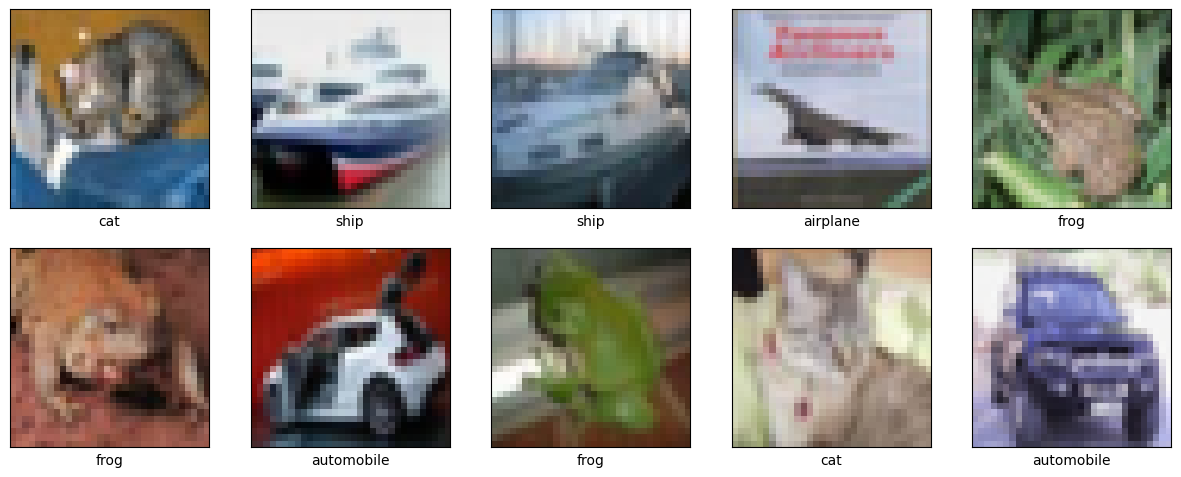

In [ ]:
# define the 10 image classes
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#show the first 10 images
plt.figure(figsize=(15,15))

for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(test_img[i])
  #Die CIFAR Labels sind Arays,deshalb 
  plt.xlabel(class_name[test_lables[i][0]])

plt.show()